1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [247]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 4, n_informative = 4, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

    

In [248]:
data, target, coef

(array([[ 1.24925579e+00,  7.07212456e-02,  1.20681107e+00,
         -4.64958307e-01],
        [-1.10835167e+00, -9.71332206e-01, -5.90090600e-01,
          9.90152682e-01],
        [ 2.88741056e-03, -5.36743869e-01, -2.99676160e+00,
         -1.23253914e+00],
        ...,
        [-2.01348046e-01, -1.45522308e+00, -8.42590683e-01,
         -5.44031799e-02],
        [-2.78885368e-01, -2.12077334e+00, -6.75848505e-01,
         -1.32161204e+00],
        [ 4.79509962e-01,  1.10741640e+00,  1.59185865e+00,
         -1.92939070e+00]]),
 array([ 1.17303671e+02, -1.19458934e+02, -2.97941285e+02, -4.61460192e+01,
        -6.74986602e+00, -4.95563993e+01, -1.61930403e+02, -1.28089758e+01,
         2.01600024e+00,  4.18600438e+01, -1.08152111e+02, -2.46230431e+02,
         1.91307900e+02, -2.47847687e+01, -1.11779739e+01,  1.69589303e+02,
        -1.54139865e+02,  8.91594235e+00,  1.73791155e+01,  1.25367501e+02,
         1.22885018e+02, -7.37502697e+01, -2.02371563e+02, -1.39579840e+02,
       

Отмасштабируем получившиеся признаки методом стандартизации.

In [249]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [250]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [251]:
# реализуем функцию, определяющую среднеквадратичную ошибку c добавления L2 -регуляризации
def mserror_L1(X, w, y_pred, lambda_=1e-1):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + (lambda_/2) * np.sum(w**2)

Подготовка данных и средств проверки закончена. Далее реализуем 
градиентный спуск.

In [252]:
%%time
# инициализируем начальный вектор весов
w1 = np.zeros(coef.shape[0])

# список векторов весов после каждой итерации
w1_list = [w1.copy()]

# список значений ошибок после каждой итерации
errors1 = []

# список значений ошибок с L2 после каждой итерации
errors1_L2 = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

#np.random.seed(1234)

# ход градиентного спуска
#while weight_dist > min_weight_dist and iter_num < max_iter:
while iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    #train_ind = np.random.randint(data.shape[0])
    
    new_w = w1 - 2 * eta * np.dot(data.T, (np.dot(data, w1) - target)) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w1, ord=2)
    
    w1_list.append(new_w.copy())
    errors1.append(mserror(data, new_w, target))
    errors1_L2.append(mserror_L1(data, new_w, target))
    
    iter_num += 1
    w1 = new_w
    
w1_list = np.array(w1_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors1[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 46.5836
CPU times: user 58.3 s, sys: 22.3 ms, total: 58.3 s
Wall time: 58.4 s


In [253]:
coef,w1,w1_list

(array([34.97278679, 75.03686389, 71.61510299, 34.65254101]),
 array([34.44882938, 78.60403137, 71.87598989, 35.01147455]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.76430112,  1.54597705,  1.37779491,  0.73897304],
        [ 1.51179373,  3.06144658,  2.72921535,  1.46235517],
        ...,
        [34.44882938, 78.60403137, 71.87598989, 35.01147455],
        [34.44882938, 78.60403137, 71.87598989, 35.01147455],
        [34.44882938, 78.60403137, 71.87598989, 35.01147455]]))

Далее реализуем стохастический градиентный спуск.

In [254]:
%%time
# инициализируем начальный вектор весов
w2 = np.zeros(coef.shape[0])

# список векторов весов после каждой итерации
w2_list = [w2.copy()]

# список значений ошибок после каждой итерации
errors2 = []

# список значений ошибок с L2 после каждой итерации
errors2_L2 = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w2 - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w2) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w2, ord=2)
    
    w2_list.append(new_w.copy())
    errors2.append(mserror(data, new_w, target))
    errors2_L2.append(mserror_L1(data, new_w, target))
    
    iter_num += 1
    w2 = new_w
    
w2_list = np.array(w2_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors2[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 447.0863
CPU times: user 51.9 s, sys: 5.87 ms, total: 51.9 s
Wall time: 52 s


In [255]:
coef,w2,w2_list

(array([34.97278679, 75.03686389, 71.61510299, 34.65254101]),
 array([29.77955859, 65.11844578, 58.65497788, 29.67636487]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-9.13918626e-04,  5.40191757e-04,  5.35768419e-04,
          1.91260852e-04],
        [ 1.17992899e-03, -1.01011729e-03,  2.67293449e-03,
          2.02068615e-03],
        ...,
        [ 2.97795104e+01,  6.51183919e+01,  5.86550351e+01,
          2.96763489e+01],
        [ 2.97795586e+01,  6.51184458e+01,  5.86549779e+01,
          2.96763649e+01],
        [ 2.97795586e+01,  6.51184458e+01,  5.86549779e+01,
          2.96763649e+01]]))

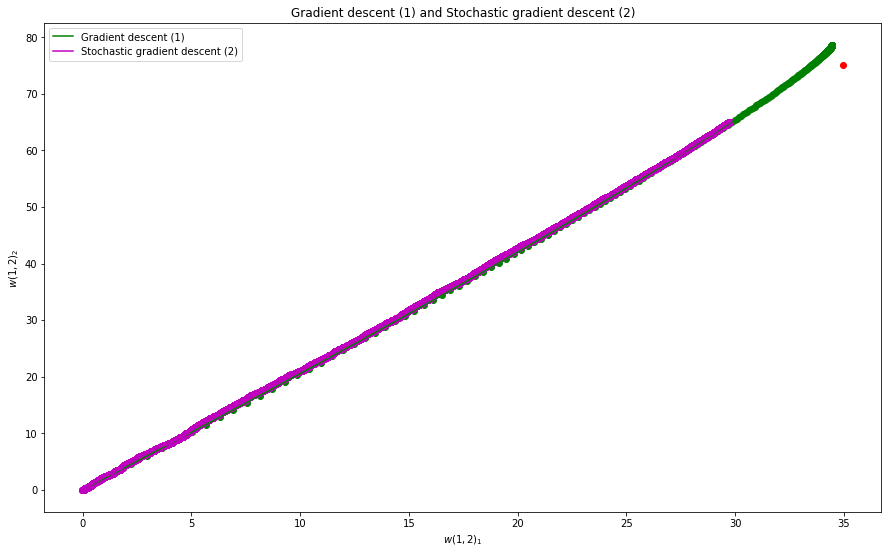

In [256]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(15, 9))
plt.title('Gradient descent (1) and Stochastic gradient descent (2)')
plt.xlabel(r'$w(1,2)_1$')
plt.ylabel(r'$w(1,2)_2$')

plt.scatter(w1_list[:, 0], w1_list[:, 1], color='g')
plt.scatter(w2_list[:, 0], w2_list[:, 1], color='m')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w1_list[:, 0], w1_list[:, 1], color='g', label='Gradient descent (1)')
plt.plot(w2_list[:, 0], w2_list[:, 1], color='m', label='Stochastic gradient descent (2)')
plt.legend(loc='best')

plt.show()

Text(0, 0.5, 'MSE')

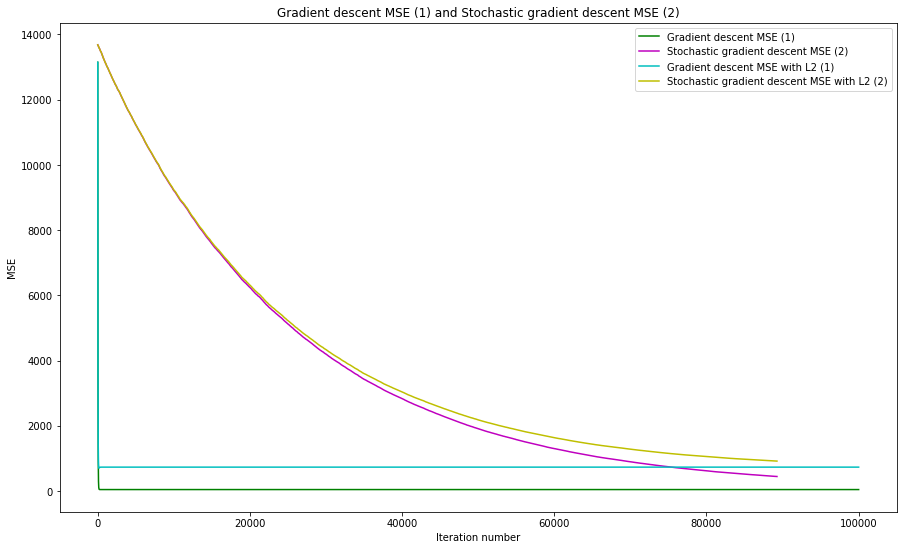

In [257]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(15, 9))
plt.title('Gradient descent MSE (1) and Stochastic gradient descent MSE (2)')
plt.plot(range(len(errors1)), errors1, color='g', label='Gradient descent MSE (1)')
plt.plot(range(len(errors2)), errors2, color='m', label='Stochastic gradient descent MSE (2)')
plt.plot(range(len(errors1_L2)), errors1_L2, color='c', label='Gradient descent MSE with L2 (1)')
plt.plot(range(len(errors2_L2)), errors2_L2, color='y', label='Stochastic gradient descent MSE with L2 (2)')
plt.legend(loc='best')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Выводы по заданию 1.**

Сравнивая методы градиентного спуска и стохастического градиентного спуска, можно сделать следующие выводы:

- сходимость, как и предсказывает теория, у градиентного спуска намного быстрее SGD;
- наибольшую точность, опять же согласно теории, показывает метод градиентного спуска;
- скорость при 1000 объектах (испытаниях/наблюдениях) у SGD, также в соответствии с теорией, чуть быстрее, но не настолько, чтобы можно было было отдать предпочтение в пользу SGD. А если применить для градиентного спуска дополнительно условие выхода weight_dist > min_weight_dist также, как и для SGD, то преимущество при 1000 объектах и 4-х признаках беспорно принадлежит методу градиентного спуска.

**Выводы по заданию 2.**

Сравнивая методы градиентного спуска и стохастического градиентного спуска с L2-регуляризацией, делаем следующие выводы:

- сходимость, как и следовало ожидать, для обоих методов ухудшается, что в данном случае говорит о том, что L2-регуляризация при 1000 объектах, 4-х признаках и сгенерированных данных является совершенно излишней.